<a href="https://colab.research.google.com/github/yossy-goddog/Prog2kakushin/blob/main/work3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print('画像を編集して表示するプログラムを作る')

In [ ]:
https://drive.google.com/file/d/1lxJrJDA57sdr0hRd0EM-ybhAUcznchsC/view?usp=drive_link

In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1lxJrJDA57sdr0hRd0EM-ybhAUcznchsC" -O images.zip
!unzip -o images.zip

--2024-01-16 07:07:19--  https://drive.google.com/uc?export=download&id=1lxJrJDA57sdr0hRd0EM-ybhAUcznchsC
Resolving drive.google.com (drive.google.com)... 64.233.183.138, 64.233.183.100, 64.233.183.139, ...
Connecting to drive.google.com (drive.google.com)|64.233.183.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1lxJrJDA57sdr0hRd0EM-ybhAUcznchsC&export=download [following]
--2024-01-16 07:07:19--  https://drive.usercontent.google.com/download?id=1lxJrJDA57sdr0hRd0EM-ybhAUcznchsC&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.69.132, 2607:f8b0:4001:c12::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.69.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2475800 (2.4M) [application/octet-stream]
Saving to: ‘images.zip’

images.zip          100%[===================>]   2.36M  --.-KB/s    in

['vex.jpg', 'viego.jpg', 'Zeus.jpg', 'yone.jpg', 'aziiru.jpg', 'atrox.jpg', 'samiira.jpg', 'gwen.jpg', 'akari.jpg', 'images.zip', 'sairasu.jpg', 'ezreal.jpg', 'sample_data']
どの写真をエッジ検出しますか? : vex.jpg


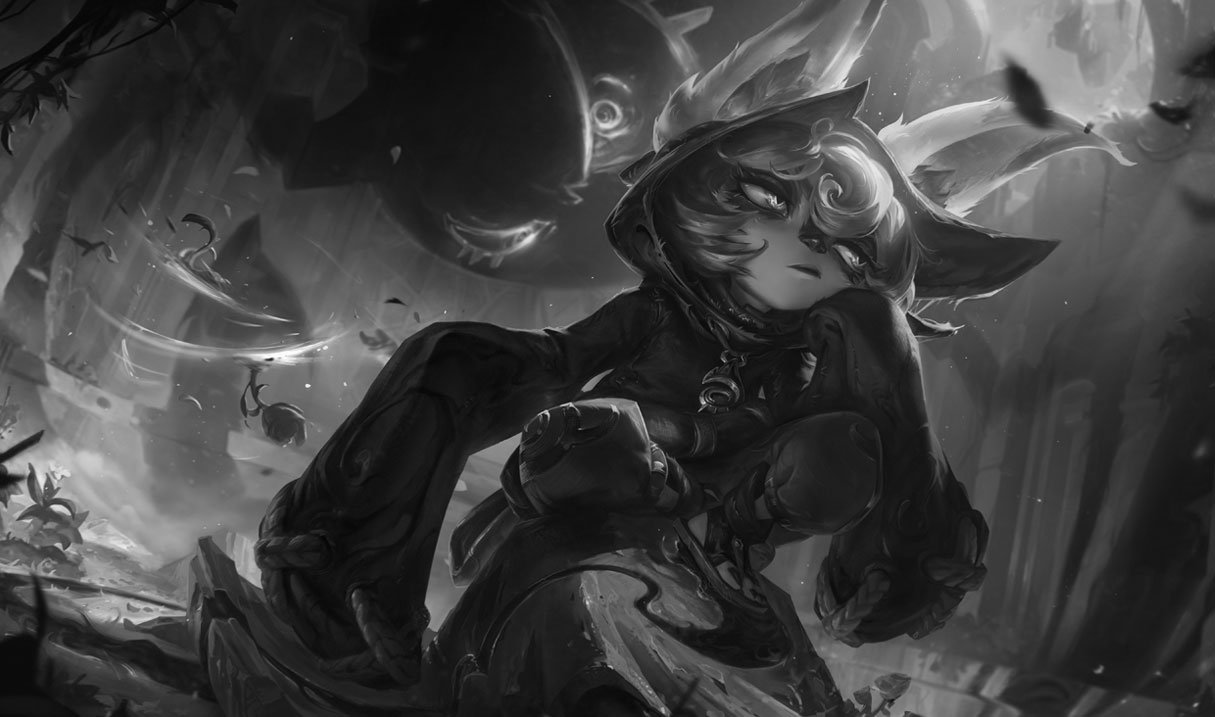

x方向にエッジ検出


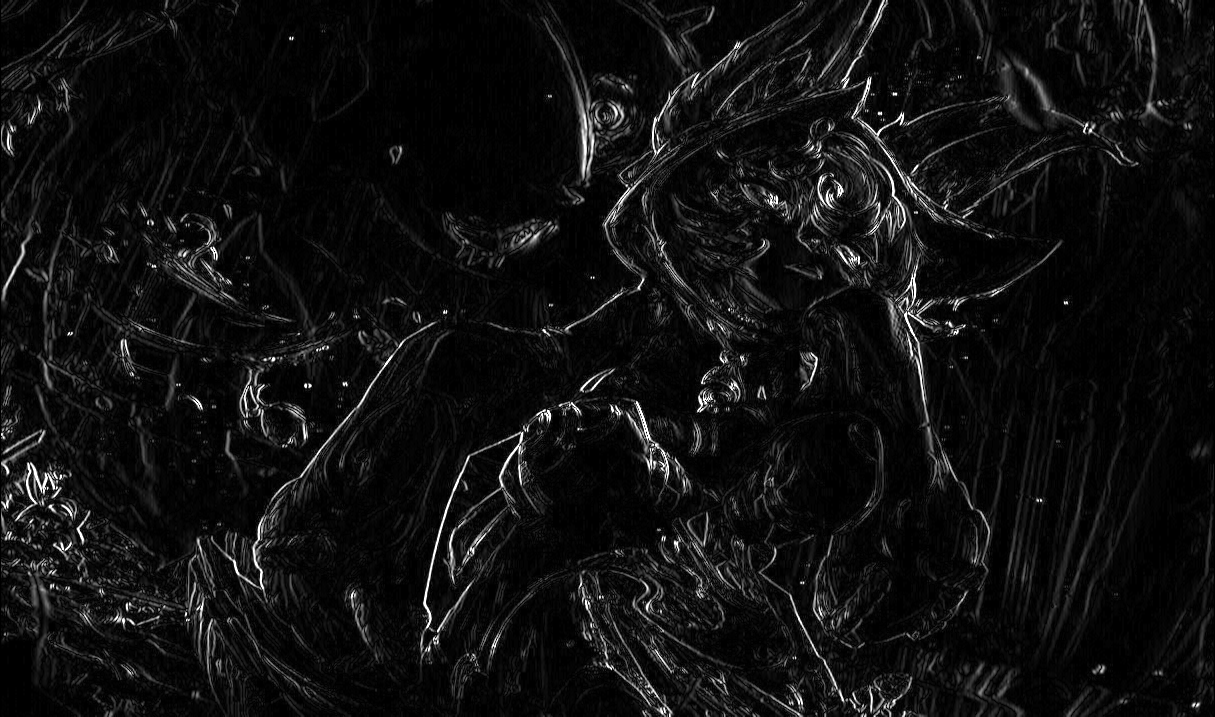

y方向にエッジ検出


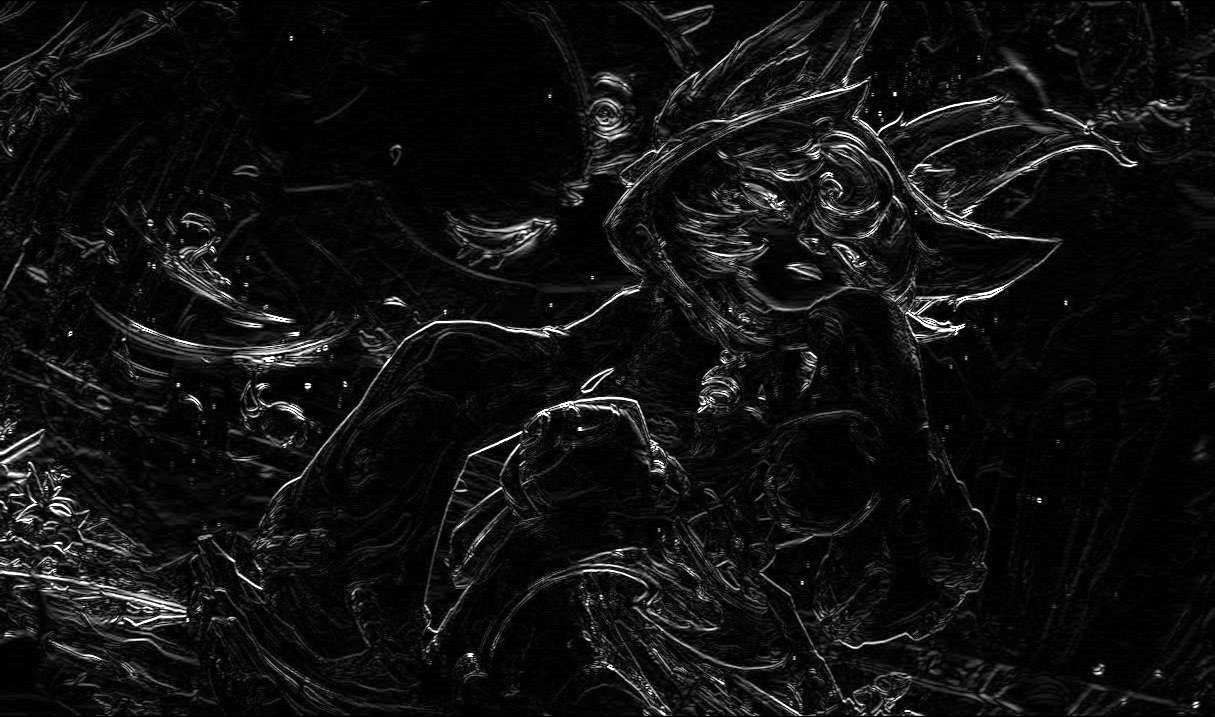

x,y方向にエッジ検出


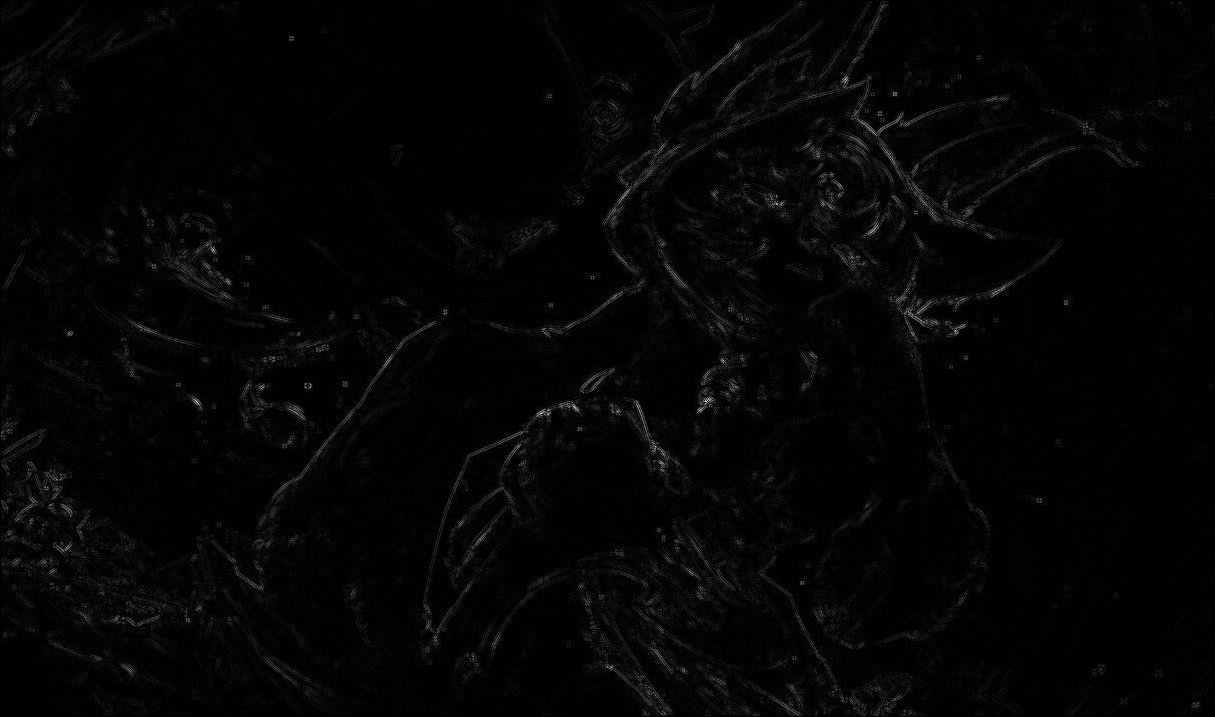

色ごとの一致度を確認する
['vex.jpg', 'viego.jpg', 'Zeus.jpg', 'yone.jpg', 'aziiru.jpg', 'atrox.jpg', 'samiira.jpg', 'gwen.jpg', 'akari.jpg', 'images.zip', 'sairasu.jpg', 'ezreal.jpg', 'sample_data']
どの写真どうしの色ごとの一致度を確認しますか? : aziiru.jpg,atrox.jpg


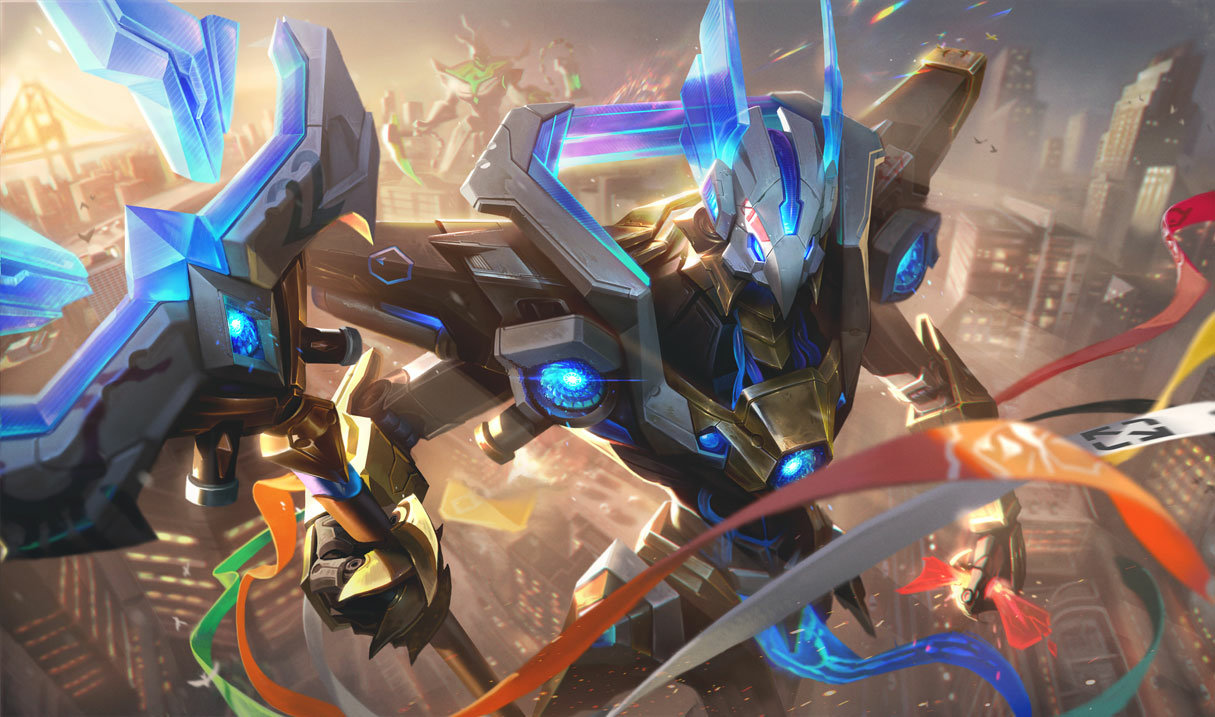

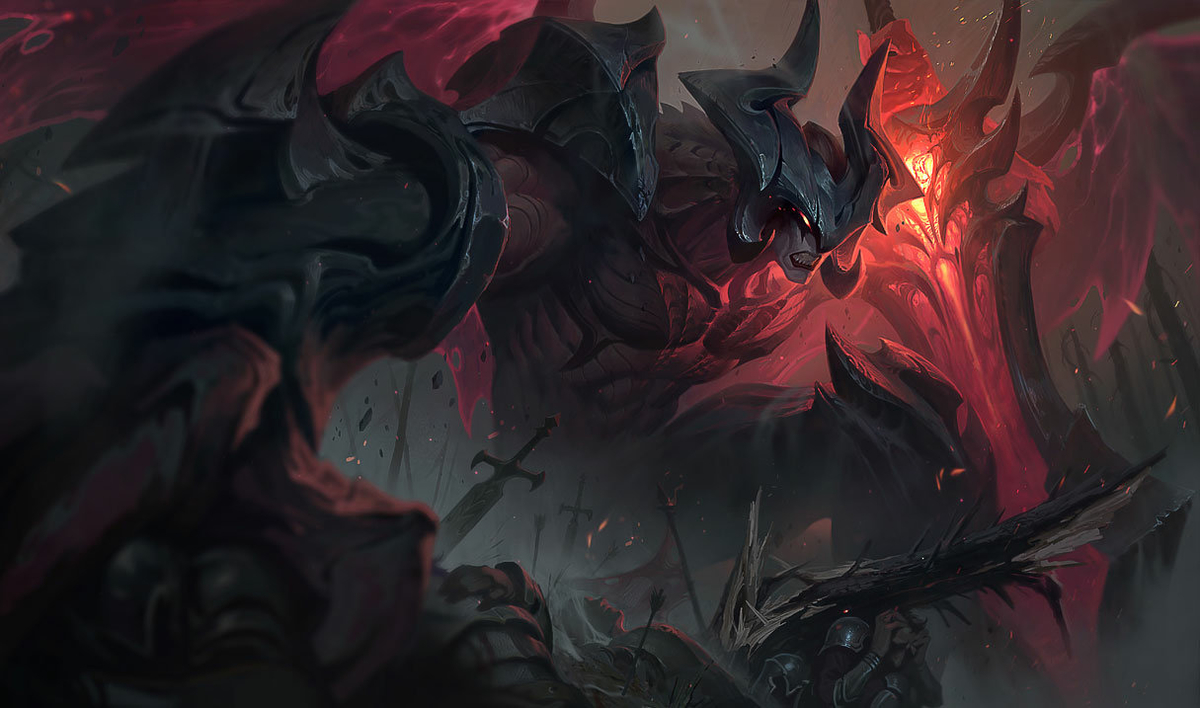

青色の一致度: 0.28364630153563647
緑色の一致度: -0.08996013221742806
赤色の一致度: -0.30683154873610224


In [ ]:
import cv2
from google.colab import files
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np
import sys
import glob

file_list=glob.glob('*')
print(file_list)
picture=input('どの写真をエッジ検出しますか? : ')
# 画像を読み込む
img_color=cv2.imread(picture)
if img_color is None:
  sys.exit('エラー：ファイルを開けません')
img=cv2.cvtColor(img_color,cv2.COLOR_BGR2GRAY)
# ソーベルフィルタ（x方向に微分）
sobel_x_img=cv2.Sobel(img,         # 入力画像
                        cv2.CV_32F,  # ビット深度
                        1,           # x方向に微分
                        0,           # y方向に微分
                        ksize=3      # カーネルサイズ(3 x 3)
                       )

# 微分した際のマイナス値を絶対値に変換
sobel_x_img=cv2.convertScaleAbs(sobel_x_img)
# ソーベルフィルタ（y方向に微分）
sobel_y_img=cv2.Sobel(img,         # 入力画像
                        cv2.CV_32F,  # ビット深度
                        0,           # x方向に微分
                        1,           # y方向に微分
                        ksize=3      # カーネルサイズ(3 x 3)
                       )

# 微分した際のマイナス値を絶対値に変換
sobel_y_img=cv2.convertScaleAbs(sobel_y_img)
# ソーベルフィルタ（x,y方向に微分）
sobel_multi_img=cv2.Sobel(img,         # 入力画像
                            cv2.CV_32F,  # ビット深度
                            1,           # x方向に微分
                            1,           # y方向に微分
                            ksize=3      # カーネルサイズ(3 x 3)
                        )

# 微分した際のマイナス値を絶対値に変換
sobel_multi_img=cv2.convertScaleAbs(sobel_multi_img)
# 表示・比較
cv2_imshow(img)                   # オリジナル画像
print('x方向にエッジ検出')
cv2_imshow(sobel_x_img)   # エッジ検出（x方向微分）
print('y方向にエッジ検出')
cv2_imshow(sobel_y_img)
print('x,y方向にエッジ検出')
cv2_imshow(sobel_multi_img)
cv2.waitKey(0)
cv2.destroyAllWindows()
#画像の一致度を確認
print('色ごとの一致度を確認する')
print(file_list)
picture2,picture3=input('どの写真どうしの色ごとの一致度を確認しますか? : ').split(',')
image1=cv2.imread(picture2,3)
if image1 is None:
  sys.exit('エラー：ファイルを開けません')
image2=cv2.imread(picture3,3)
if image2 is None:
  sys.exit('エラー：ファイルを開けません')
cv2_imshow(image1)
cv2_imshow(image2)
# 画像をヒストグラム化する(青)
image1_hist_blue=cv2.calcHist([image1], [0], None, [256], [0, 256])
image2_hist_blue=cv2.calcHist([image2], [0], None, [256], [0, 256])
# 画像をヒストグラム化する(緑)
image1_hist_green=cv2.calcHist([image1], [1], None, [256], [0, 256])
image2_hist_green=cv2.calcHist([image2], [1], None, [256], [0, 256])
# 画像をヒストグラム化する(赤)
image1_hist_red=cv2.calcHist([image1], [2], None, [256], [0, 256])
image2_hist_red=cv2.calcHist([image2], [2], None, [256], [0, 256])
# ヒストグラムした画像を比較
print(f'青色の一致度: {cv2.compareHist(image1_hist_blue, image2_hist_blue, method=cv2.HISTCMP_CORREL)}')
print(f'緑色の一致度: {cv2.compareHist(image1_hist_green, image2_hist_green, method=cv2.HISTCMP_CORREL)}')
print(f'赤色の一致度: {cv2.compareHist(image1_hist_red, image2_hist_red, method=cv2.HISTCMP_CORREL)}')